<h1>Homework 7: Signal Processing and Fourier Transform<h1>

**Problem 1**
The file **prob1.txt** below contains a mystery signal that was recorded after convolution with an
instrument whose response function has the form

$$
g(t)=\left\{\begin{array}{ll}0 & t<0 \\ \alpha\,e^{-\alpha\,t} & t\geq 0\end{array}\right.
$$

The sample rate was $10^3$ samples/s and the instrument response time constant,
$\tau=\alpha^{-1}$ was 0.1 s. Use the convolution theorem

$$
\mathcal{F}[f*g]=\mathcal{F}[f]\times \mathcal{F}[g]
$$

(where $\mathcal{F}[f]$ represents the Fourier transform of) to deduce the original signal. Prepare

a plot with a properly labeled time axis.

In [70]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

In [71]:
# import the data
data = np.loadtxt('prob1.txt')

# define g(t)
def g(t, alpha):
    if t<0:
        return 0
    else:
        return alpha*np.exp(-alpha*t)
    
# define the constants
tau = 0.1
alpha = 1/tau
sample_rate = 1/1000

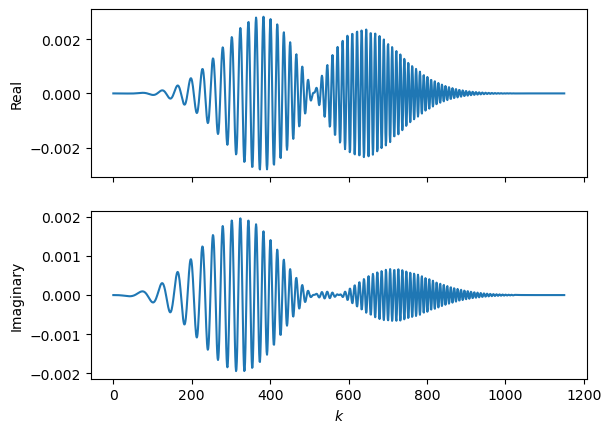

In [75]:
# create the time array
t = np.linspace(0, sample_rate * len(data), len(data))

# calculate Fourier transform of g(t)
G = fft([g(i, alpha) for i in t])

# calculate Fourier transform of input using convolution theorem
F = data/G

# calculate original signal
f = ifft(F)

# plot the results
fig, axs = plt.subplots(nrows=2, sharex=True)
axs[0].plot(np.real(F))
axs[0].set_ylabel("Real")
axs[1].plot(np.imag(F))
axs[1].set_ylabel("Imaginary")
axs[1].set_xlabel("$k$")
fig.align_ylabels(axs);

**Problem 3**
Compute the Fourier transform $\tilde{f}(k)$ for

$$
f(x) = \left\{\begin{array}{ll}A\,(a-|x|) & -a < x < a \\ 0 & \text{Otherwise}\end{array}\right.
$$

Plot the result and compare with the analytic result from the previous homework assignment.

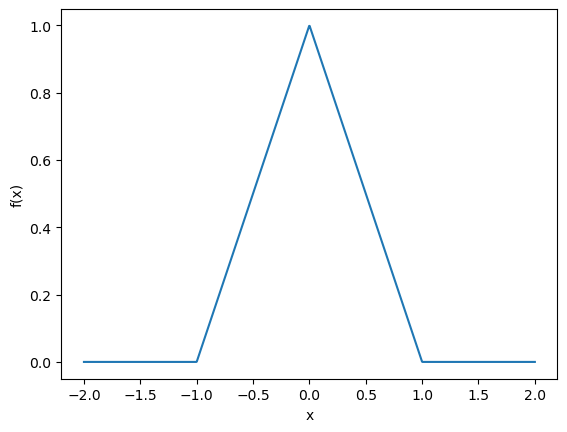

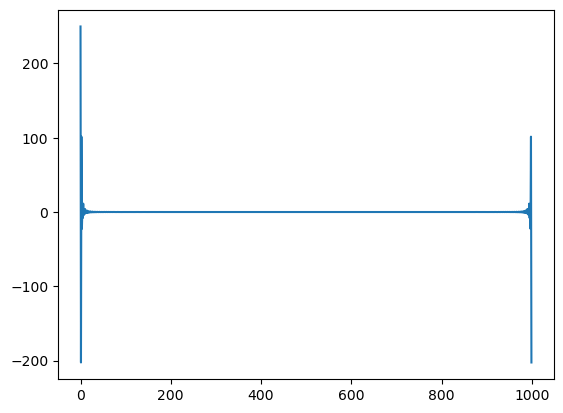

In [80]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, A=1, a=1):
    if np.abs(x) < a:
        return A * (a - np.abs(x))
    else:
        return 0

a = 1
A = 1

x = np.linspace(-2*a, 2*a, 1000)
y = np.array([f(i, A, a) for i in x])

f_tilde = fft(y)

# plot the results
plt.figure()
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.figure()
plt.plot(np.real(f_tilde))
plt.show()

**Problem 4**
Data from sampling a periodic signal at 1024 samples per second are stored in a text file
**prob4.txt** below. The values in the file are measured potentials
(in volts). To load text data into a numpy array, you can use the function **np.loadtxt(filename)**.

1. Load the data and prepare a properly labeled plot of the potential as a function of time.
    
2. Use the FFT to deduce the frequency composition of this signal, which is the
superposition of a fundamental and several harmonics with varying amplitudes.

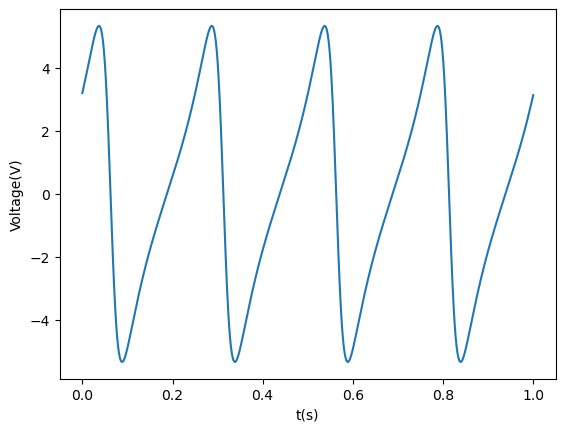

In [44]:
# import the data
data = np.loadtxt('prob4.txt')

# define constants
sample_rate = 1/1024
t = np.linspace(0, sample_rate * len(data), len(data))

# graph data
plt.figure()
plt.plot(t, data)
plt.ylabel('Voltage(V)')
plt.xlabel('t(s)')
plt.show()

In [81]:
# calculate Fourier transform of data
F = fft(data)

# calculate the frequency array
freq = fftfreq(len(data), sample_rate)

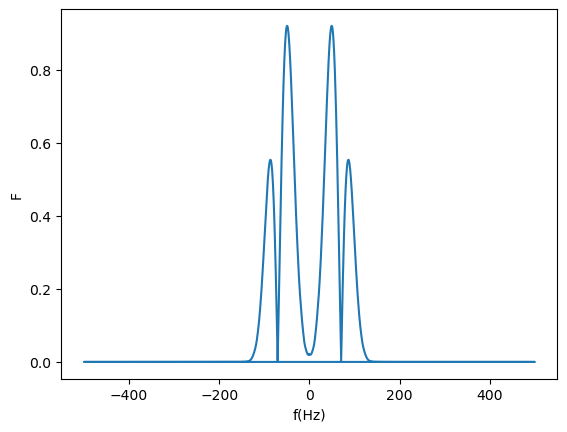

In [82]:
# graph the Fourier transform
plt.figure()
plt.plot(freq, np.abs(F))
plt.ylabel('F')
plt.xlabel('f(Hz)')
plt.show()

In [84]:
# filter out positive frequencies
F_filtered = F.copy()
F_filtered[freq > 0] = 0

# get the frequencies with the largest magnitude
max_freq = np.abs(F).argsort()[-5:]
max_freq = freq[max_freq]
max_freq

array([ 50.39096438, -48.65334492,  48.65334492, -49.52215465,
        49.52215465])

Thus the 5 frequencies with the highest amplitudes are 4Hz(2048), 8Hz(1024), 12Hz(512), 16Hz(256), and 20Hz(128).

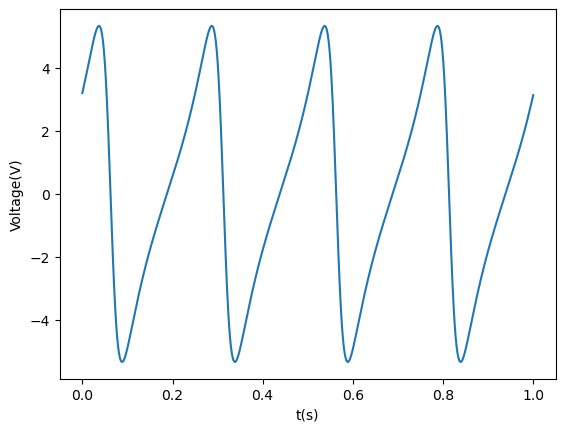

In [56]:
# perform inverse Fourier transform to restore the signal
f = np.fft.ifft(np.fft.ifftshift(F))

# graph the filtered signal
plt.figure()
plt.plot(t, np.real(f))
plt.ylabel('Voltage(V)')
plt.xlabel('t(s)')
plt.show()